In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

## Write your code here
data=pd.read_csv('/content/drive/My Drive/trialdata/spam.csv')

In [7]:
data.head()

,text,target
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham


In [29]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
data= data [['target','text']]
data_list = list(data['text'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [9]:
#checking the count of the dependent variable
data['target'].value_counts()

ham     4825
spam    747 
Name: target, dtype: int64

In [10]:
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['text'].apply(lambda x:remove_punctuation(x))
data.head()

,target,text,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


In [11]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
data.head()

,target,text,clean_msg,msg_lower
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though


In [12]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data.head()

,target,text,clean_msg,msg_lower,msg_tokenied
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though]


In [14]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [16]:
#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data.head()

,target,text,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though]


In [17]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [18]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))
data.head()

,target,text,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though]


In [21]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,target,text,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni],[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say],[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though]


In [46]:
from sklearn.model_selection import train_test_split
# Split into training and testing data
x = data_list
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize text reviews to numbers
vec = CountVectorizer()
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

Accuracy: 0.9820531227566404 %
 


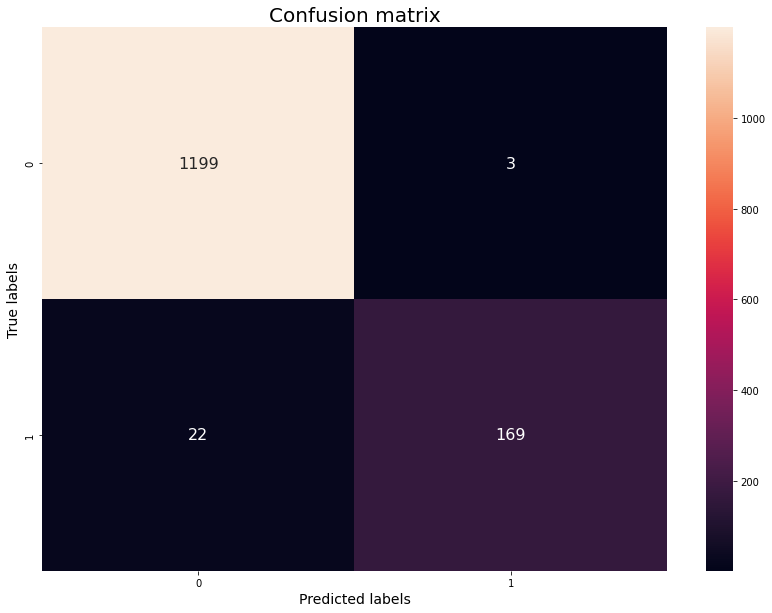

In [57]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

import numpy as np
model = MultinomialNB()
model.fit(x_train, y_train)
acc=model.score(x_test, y_test)
pred_labels = model.predict(x_test)
y_test = list(y_test)

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

print(f"Accuracy: {acc} %\n ")

# report   = classification_report(test_labels,pred_labels,target_names=test_data.target_names)
# print("-"*24+" Classification report "+"-"*24+"\n")
# print(report)

conf_mat = confusion_matrix(y_test,pred_labels)
fig= plt.figure(figsize=(14,10))
sns.heatmap(conf_mat,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()